In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
time: 338 µs (started: 2024-07-06 14:39:20 +00:00)


In [ ]:
!git clone https://github.com/abdisonfire/CSE499.git

Cloning into 'CSE499'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 55 (delta 6), reused 50 (delta 4), pack-reused 0
Receiving objects: 100% (55/55), 1.05 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (6/6), done.
time: 912 ms (started: 2024-07-06 14:39:20 +00:00)


In [ ]:
%pip install qiskit matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.1 MB/s eta 0:00:00
time: 23.3 s (started: 2024-07-06 14:39:21 +00:00)


In [ ]:
from CSE499.approximate_function_loading import lib
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import math
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
from google.colab import files

time: 980 ms (started: 2024-07-06 14:39:44 +00:00)


In [ ]:
def normal_distribution(x):
    return (1/math.sqrt(2*math.pi))*math.exp(-((7.6*x-3.8)**2)/2)

time: 3.06 ms (started: 2024-07-06 14:39:45 +00:00)


In [ ]:
def get_thetas(num_qubit, fn, x_min, x_max):
    median_thetas = []
    worst_thetas = []
    for k in range(num_qubit):
        k += 1
        thetas_k = [lib.theta_lk(fn, x_min, x_max, k, i) for i in range(2**(k-1))]
        median_thetas.append(np.median(thetas_k))
        worst_thetas.append(np.max([np.abs(np.pi/2 - theta) for theta in thetas_k]))

    return median_thetas, worst_thetas

    return qc

median_thetas, worst_thetas = get_thetas(10, normal_distribution, 0, 1)


time: 41.3 ms (started: 2024-07-06 14:39:45 +00:00)


In [ ]:
print(median_thetas, '\n',worst_thetas)

[1.5707963267948966, 1.570796326794897, 1.5707963267948966, 1.5707963267948963, 1.5707963267948968, 1.5707963267948966, 1.5707963267948963, 1.570796326794897, 1.5707963267948963, 1.5707963267948966] 
 [0.0, 1.0873679749151988, 1.0206021278063764, 0.7077559286729732, 0.40916603733934553, 0.21660440327997454, 0.11078986641177346, 0.05593228061597855, 0.028088746453257762, 0.014073491185653486]
time: 8.73 ms (started: 2024-07-06 07:46:16 +00:00)


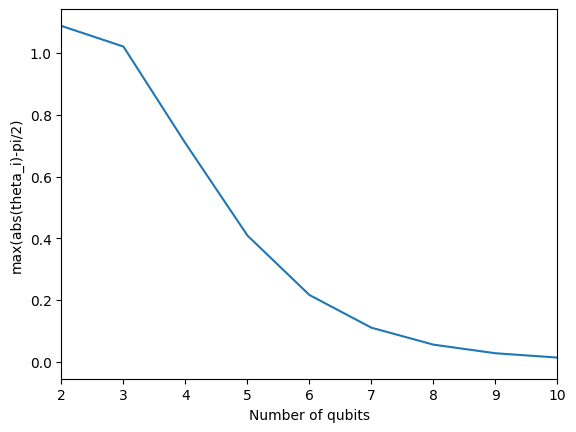

time: 278 ms (started: 2024-07-06 07:41:04 +00:00)


In [ ]:
plt.xlim(2, 10)
plt.xlabel('Number of qubits')
plt.ylabel('max(abs(theta_i)-pi/2)')
plt.plot([i+1 for i in range(len(worst_thetas))],worst_thetas)
# plt.savefig('worst_thetas_10_normal_distribution.svg')
# files.download('worst_thetas_10_normal_distribution.svg')

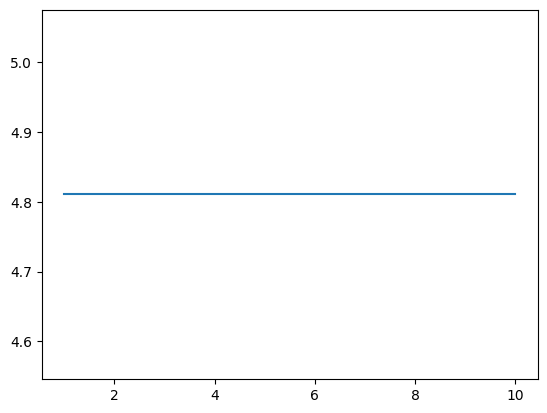

time: 196 ms (started: 2024-07-06 07:45:06 +00:00)


In [ ]:
plt.plot([i+1 for i in range(len(median_thetas))],[math.exp(theta) for theta in median_thetas])
# plt.savefig('median_thetas_10_normal_distribution.svg')
# files.download('median_thetas_10_normal_distribution.svg')

In [ ]:
def supremum_infimum(func, interval):
    a, b = interval  # Unpack start and end points

    # Sample points within the interval (adjust num_points as needed)
    num_points = 2**15
    samples = np.linspace(a, b, num_points)

    # Evaluate function at sample points
    function_values = [func(x) for x in samples]

    # Estimate supremum and infimum using NumPy
    sup = np.max(function_values)
    inf = np.min(function_values)
    # print(np.sum(function_values))
    return sup, inf
def get_k0(eps, sup, interval):
    # sup, inf = supremum_infimum(fn, interval)
    # return max(math.ceil(math.log2(max(abs(sup),abs(inf))/eps)), 2)
    return max(math.ceil(math.log2(sup/eps)), 2)

def fidelity(psi1, psi2):
    overlap = np.abs(np.dot((np.array(psi1).conj()), np.array(psi2)))**2
    return overlap

time: 1.28 ms (started: 2024-07-04 18:32:58 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(10, normal_distribution, 0, 1)

time: 50.7 s (started: 2024-07-04 18:33:26 +00:00)


In [ ]:
# plt.plot(Statevector(qc1))
# plt.savefig('naive_pdf_10.svg')
# files.download('naive_pdf_10.svg')

time: 390 µs (started: 2024-07-04 18:34:17 +00:00)


In [ ]:
k_0 = get_k0(0.01, 1.839, (0, 1))
print(k_0)

8
time: 540 µs (started: 2024-07-04 18:34:17 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(10, normal_distribution, 0, 1, k_0)

time: 10 s (started: 2024-07-04 18:34:17 +00:00)


In [ ]:
# plt.plot(Statevector(qc2))
# plt.savefig('approx_pdf_10.svg')
# files.download('approx_pdf_10.svg')

time: 374 µs (started: 2024-07-04 18:34:27 +00:00)


In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999828246428054
time: 24.6 s (started: 2024-07-04 18:34:27 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(12, normal_distribution, 0, 1)

time: 4min 7s (started: 2024-07-04 20:54:36 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

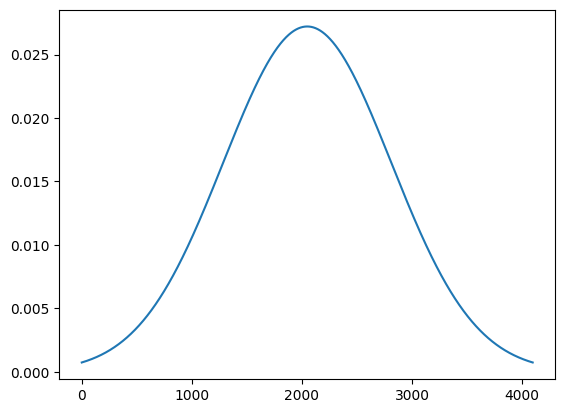

time: 2min 45s (started: 2024-07-04 20:58:43 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_pdf_12.svg')
files.download('naive_pdf_12.svg')

In [ ]:
k_0 = get_k0(0.01, 1.839, (0, 1))
print(k_0)

8
time: 567 µs (started: 2024-07-04 18:38:55 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(12, normal_distribution, 0, 1, k_0)

time: 9.48 s (started: 2024-07-04 20:53:14 +00:00)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

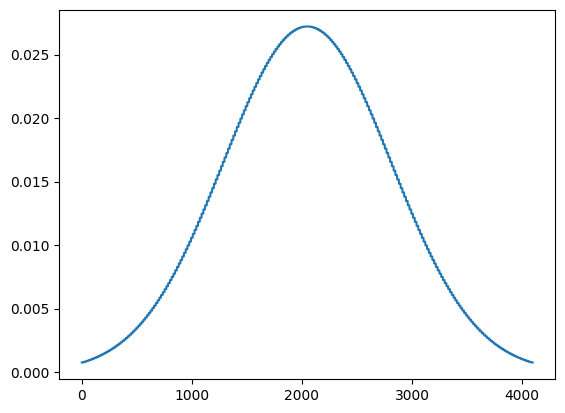

time: 4.48 s (started: 2024-07-04 20:53:34 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_pdf_12.svg')
files.download('approx_pdf_12.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999817511229298
time: 3min 12s (started: 2024-07-04 18:39:03 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(11, normal_distribution, 0, 1)

time: 1min 39s (started: 2024-07-04 19:18:07 +00:00)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

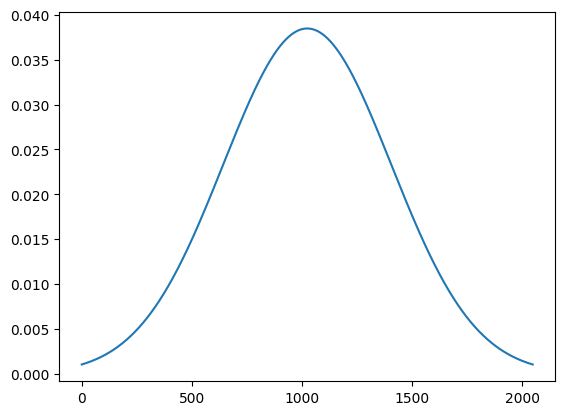

time: 55.9 s (started: 2024-07-04 19:20:20 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_pdf_11.svg')
files.download('naive_pdf_11.svg')

In [ ]:
k_0 = get_k0(0.01, 1.839, (0, 1))
print(k_0)

8
time: 685 µs (started: 2024-07-04 19:21:16 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(11, normal_distribution, 0, 1, k_0)

time: 8.54 s (started: 2024-07-04 19:21:16 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

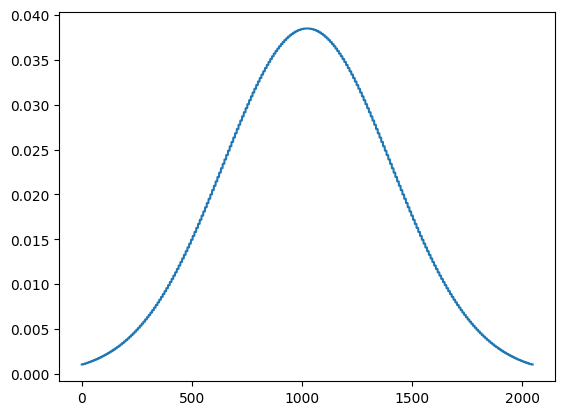

time: 4.64 s (started: 2024-07-04 19:21:24 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_pdf_11.svg')
files.download('approx_pdf_11.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.999981965831128
time: 1min 24s (started: 2024-07-04 19:21:29 +00:00)


In [ ]:
def exponential_distribution(x):
    return math.exp(-3*x)

time: 559 µs (started: 2024-07-06 14:40:15 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(10, exponential_distribution, 0, 1)

time: 50.9 s (started: 2024-07-04 19:30:31 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

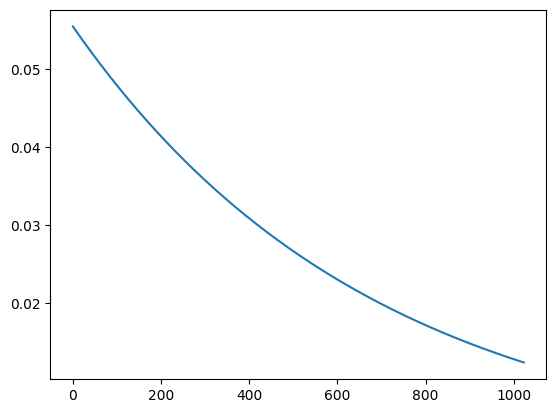

time: 24.4 s (started: 2024-07-04 19:31:22 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_edf_10.svg')
files.download('naive_edf_10.svg')

In [ ]:
k_0 = get_k0(0.05, 9, (0, 1))
print(k_0)

8
time: 1.72 ms (started: 2024-07-04 19:32:00 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(10, exponential_distribution, 0, 1, k_0)

time: 10.3 s (started: 2024-07-04 19:33:37 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

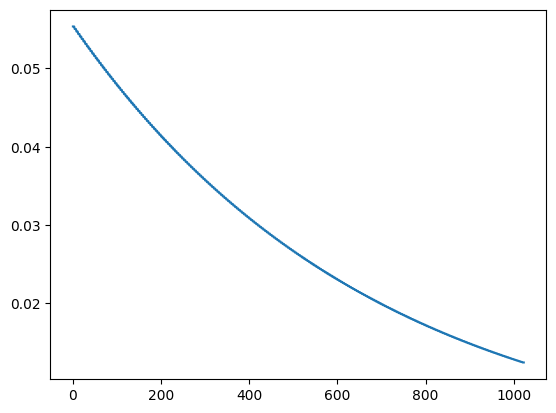

time: 3.32 s (started: 2024-07-04 19:33:47 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_edf_10.svg')
files.download('approx_edf_10.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999973177986674
time: 26.1 s (started: 2024-07-04 19:34:27 +00:00)


time: 33.1 s (started: 2024-07-04 19:34:27 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(12, exponential_distribution, 0, 1)

time: 4min 1s (started: 2024-07-04 20:33:13 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

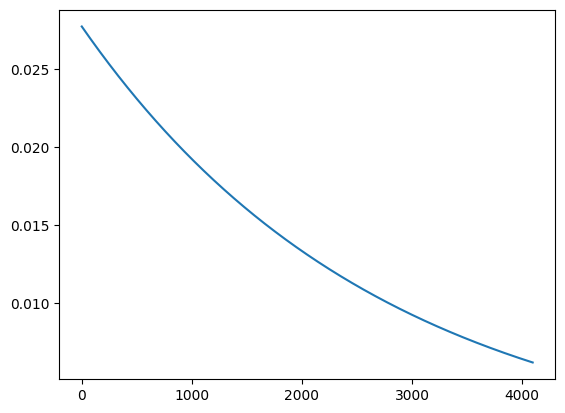

time: 2min 41s (started: 2024-07-04 19:39:03 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_edf_12.svg')
files.download('naive_edf_12.svg')

In [ ]:
k_0 = get_k0(0.05, 9, (0, 1))
print(k_0)

8
time: 1.73 ms (started: 2024-07-04 19:41:44 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(12, exponential_distribution, 0, 1, k_0)

time: 9.39 s (started: 2024-07-04 20:37:14 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

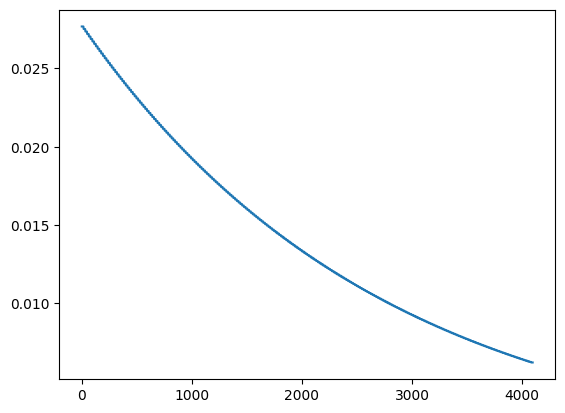

time: 5.3 s (started: 2024-07-04 19:41:53 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_edf_12.svg')
files.download('approx_edf_12.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999971501533296
time: 2min 47s (started: 2024-07-04 20:37:23 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(11, exponential_distribution, 0, 1)

time: 1min 53s (started: 2024-07-04 19:41:58 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

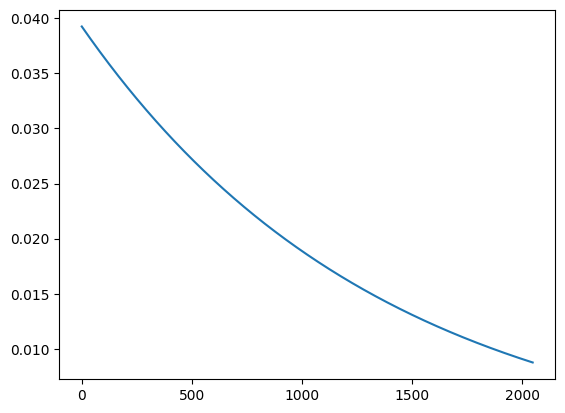

time: 59.4 s (started: 2024-07-04 19:43:52 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_edf_11.svg')
files.download('naive_edf_11.svg')

In [ ]:
k_0 = get_k0(0.05, 9, (0, 1))
print(k_0)

8
time: 896 µs (started: 2024-07-04 19:44:51 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(11, exponential_distribution, 0, 1, k_0)

time: 9.61 s (started: 2024-07-04 19:44:51 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

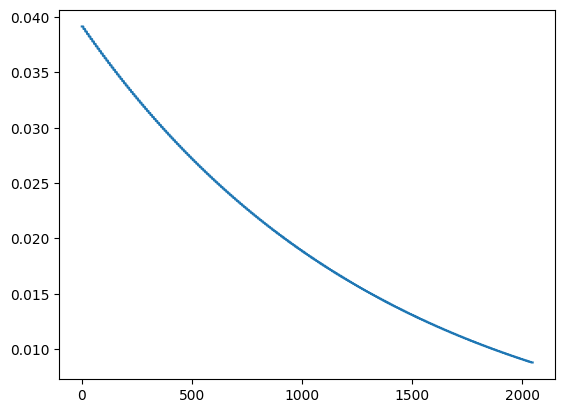

time: 3.83 s (started: 2024-07-04 19:45:01 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_edf_11.svg')
files.download('approx_edf_11.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999971836863584
time: 1min 2s (started: 2024-07-04 19:45:05 +00:00)


time: 1min 2s (started: 2024-07-04 19:45:05 +00:00)


In [ ]:
def exponential_sin(x):
    return math.exp(math.sin(8*x))

time: 618 µs (started: 2024-07-06 14:40:08 +00:00)


time: 1.67 s (started: 2024-07-04 19:48:04 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(10, exponential_sin, 0, 1)

time: 52.3 s (started: 2024-07-04 19:49:45 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

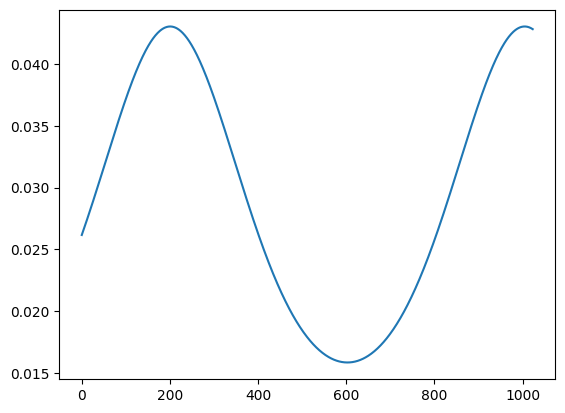

time: 26.2 s (started: 2024-07-04 19:50:37 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_esinf_10.svg')
files.download('naive_esinf_10.svg')

In [ ]:
k_0 = get_k0(0.30, 64, (0, 1))
print(k_0)

8
time: 977 µs (started: 2024-07-04 19:56:46 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(10, exponential_sin, 0, 1, k_0)

time: 10.8 s (started: 2024-07-04 19:56:54 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

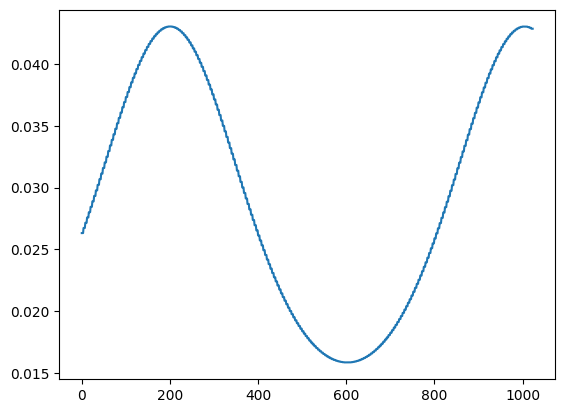

time: 4.29 s (started: 2024-07-04 19:57:04 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_esinf_10.svg')
files.download('approx_esinf_10.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999920115876163
time: 28.2 s (started: 2024-07-04 19:59:39 +00:00)


time: 33.1 s (started: 2024-07-04 19:34:27 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(12, exponential_sin, 0, 1)

time: 4min 3s (started: 2024-07-04 20:40:13 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

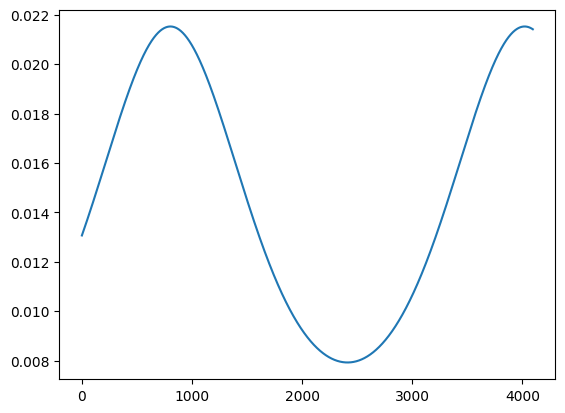

time: 2min 54s (started: 2024-07-04 20:05:09 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_esinf_12.svg')
files.download('naive_esinf_12.svg')

In [ ]:
k_0 = get_k0(0.30, 64, (0, 1))
print(k_0)

8
time: 3.18 ms (started: 2024-07-04 20:08:03 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(12, exponential_sin, 0, 1, k_0)

time: 9.85 s (started: 2024-07-04 20:44:16 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

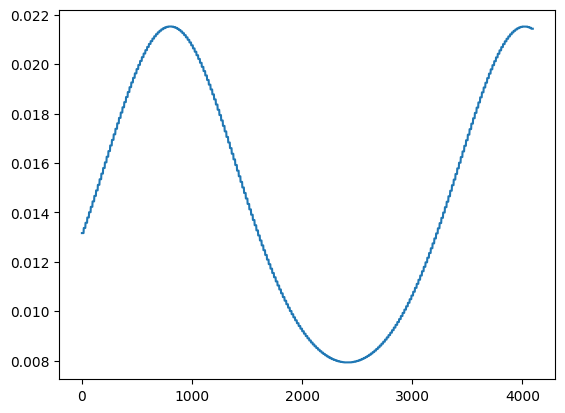

time: 5.69 s (started: 2024-07-04 20:08:14 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_esinf_12.svg')
files.download('approx_esinf_12.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.999991512278871
time: 2min 47s (started: 2024-07-04 20:44:26 +00:00)


In [ ]:
qc1 = lib.get_naive_quantum_circuit(11, exponential_sin, 0, 1)

time: 2min 1s (started: 2024-07-04 20:08:20 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

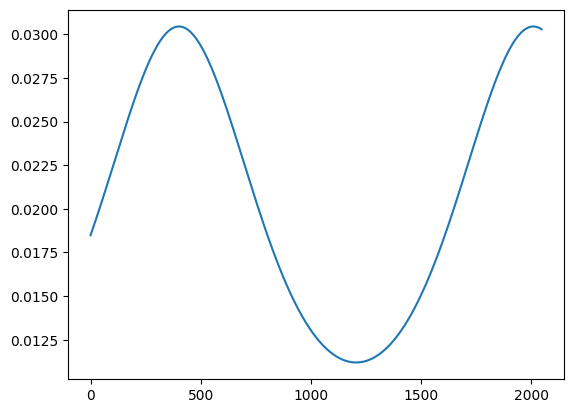

time: 1min 4s (started: 2024-07-04 20:10:22 +00:00)


In [ ]:
plt.plot(Statevector(qc1))
plt.savefig('naive_esinf_11.svg')
files.download('naive_esinf_11.svg')

In [ ]:
k_0 = get_k0(0.30, 64, (0, 1))
print(k_0)

8
time: 3.56 ms (started: 2024-07-04 20:11:26 +00:00)


In [ ]:
qc2 = lib.get_approximate_quantum_circuit(11, exponential_sin, 0, 1, k_0)

time: 10.5 s (started: 2024-07-04 20:11:26 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

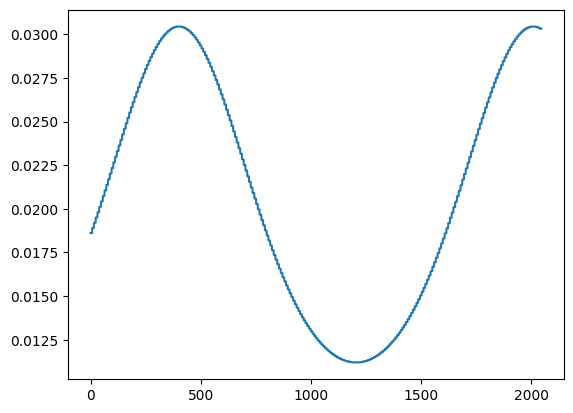

time: 7.61 s (started: 2024-07-04 20:11:37 +00:00)


In [ ]:
plt.plot(Statevector(qc2))
plt.savefig('approx_esinf_11.svg')
files.download('approx_esinf_11.svg')

In [ ]:
print(fidelity(Statevector(qc1), Statevector(qc2)))

0.9999916121444091
time: 1min 6s (started: 2024-07-04 20:11:44 +00:00)


In [ ]:
median_thetas, worst_thetas = get_thetas(15, exponential_distribution, 0, 1)

time: 595 ms (started: 2024-07-06 07:49:14 +00:00)


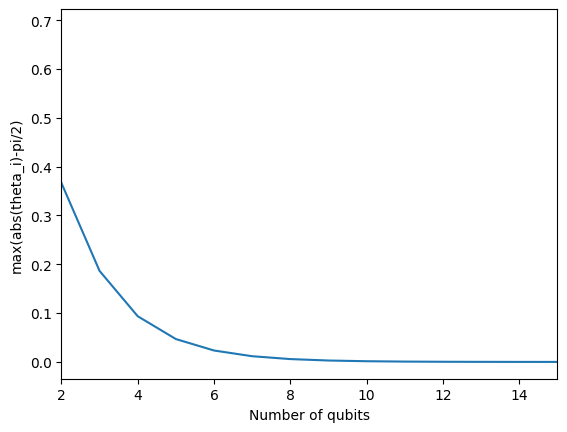

time: 585 ms (started: 2024-07-06 07:49:58 +00:00)


In [ ]:
plt.xlim(2, 15)
plt.xlabel('Number of qubits')
plt.ylabel('max(abs(theta_i)-pi/2)')
plt.plot([i+1 for i in range(len(worst_thetas))],worst_thetas)
# plt.savefig('worst_thetas_10_normal_distribution.svg')
# files.download('worst_thetas_10_normal_distribution.svg')

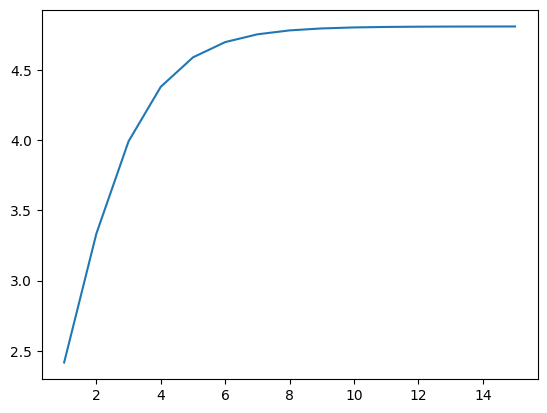

time: 560 ms (started: 2024-07-06 07:51:00 +00:00)


In [ ]:
plt.plot([i+1 for i in range(len(median_thetas))],[math.exp(theta) for theta in median_thetas])
# plt.savefig('median_thetas_10_normal_distribution.svg')
# files.download('median_thetas_10_normal_distribution.svg')

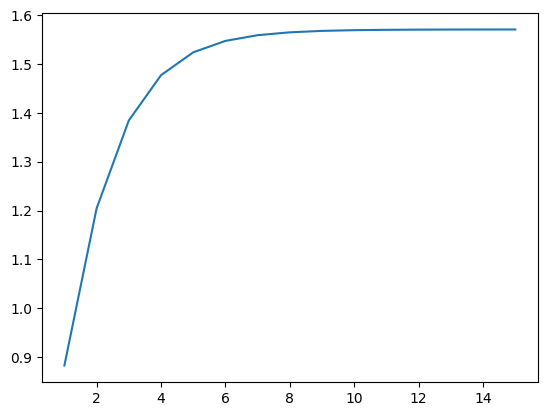

time: 562 ms (started: 2024-07-06 07:51:43 +00:00)


In [ ]:
plt.plot([i+1 for i in range(len(median_thetas))],median_thetas)
# plt.savefig('median_thetas_10_normal_distribution.svg')
# files.download('median_thetas_10_normal_distribution.svg')

In [ ]:
median_thetas, worst_thetas = get_thetas(20, exponential_distribution, 0, 1)

time: 21.4 s (started: 2024-07-06 07:52:34 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

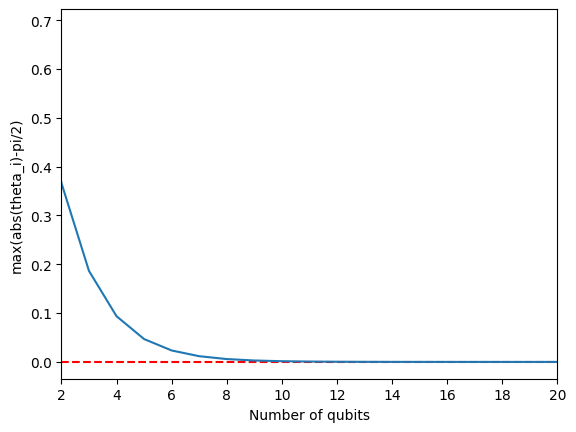

time: 504 ms (started: 2024-07-06 08:07:18 +00:00)


In [ ]:
plt.xlim(2, len(worst_thetas))
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')
plt.xlabel('Number of qubits')
plt.ylabel('max(abs(theta_i)-pi/2)')
plt.plot([i+1 for i in range(len(worst_thetas))],worst_thetas)
plt.savefig('worst_thetas_20_exponential_distribution.svg')
files.download('worst_thetas_20_exponential_distribution.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

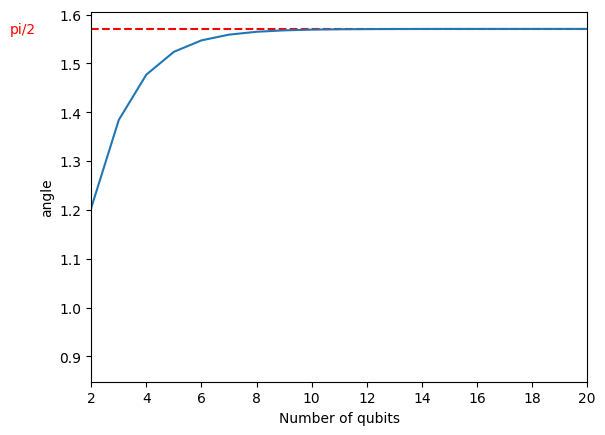

time: 842 ms (started: 2024-07-06 08:08:03 +00:00)


In [ ]:
plt.xlim(2, len(median_thetas))
plt.axhline(y = np.pi/2, color = 'r', linestyle = 'dashed')
plt.text(0,np.pi/2, "pi/2", color="red",
        ha="right", va="center")
plt.xlabel('Number of qubits')
plt.ylabel('angle')
plt.plot([i+1 for i in range(len(median_thetas))],median_thetas)
plt.savefig('median_thetas_20_exponential_distribution.svg')
files.download('median_thetas_20_exponential_distribution.svg')

In [ ]:
median_thetas, worst_thetas = get_thetas(20, exponential_sin, 0, 1)

time: 23.7 s (started: 2024-07-06 08:14:53 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

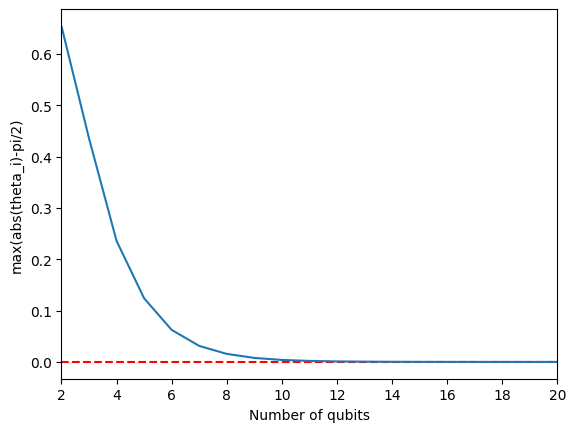

time: 511 ms (started: 2024-07-06 08:15:16 +00:00)


In [ ]:
plt.xlim(2, len(worst_thetas))
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')
plt.xlabel('Number of qubits')
plt.ylabel('max(abs(theta_i)-pi/2)')
plt.plot([i+1 for i in range(len(worst_thetas))],worst_thetas)
plt.savefig('worst_thetas_20_exponential_sine.svg')
files.download('worst_thetas_20_exponential_sine.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

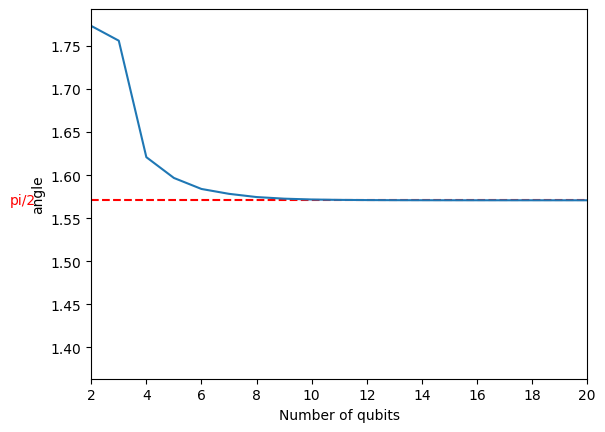

time: 526 ms (started: 2024-07-06 08:15:17 +00:00)


In [ ]:
plt.xlim(2, len(median_thetas))
plt.axhline(y = np.pi/2, color = 'r', linestyle = 'dashed')
plt.text(0,np.pi/2, "pi/2", color="red",
        ha="right", va="center")
plt.xlabel('Number of qubits')
plt.ylabel('angle')
plt.plot([i+1 for i in range(len(median_thetas))],median_thetas)
plt.savefig('median_thetas_20_exponential_sine.svg')
files.download('median_thetas_20_exponential_sine.svg')

In [ ]:
median_thetas, worst_thetas = get_thetas(20, normal_distribution, 0, 1)

time: 39.1 s (started: 2024-07-06 08:12:34 +00:00)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

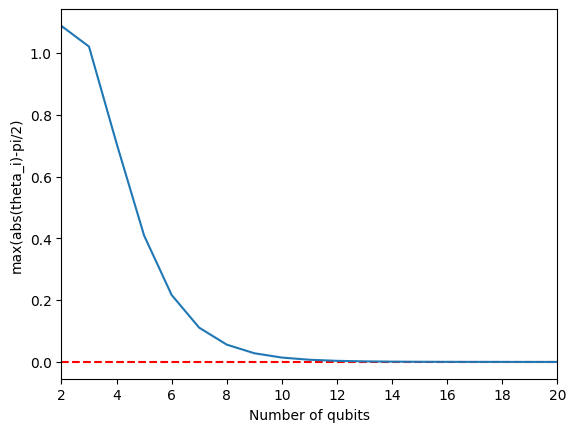

time: 314 ms (started: 2024-07-06 08:14:01 +00:00)


In [ ]:
plt.xlim(2, len(worst_thetas))
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')
plt.xlabel('Number of qubits')
plt.ylabel('max(abs(theta_i)-pi/2)')
plt.plot([i+1 for i in range(len(worst_thetas))],worst_thetas)
plt.savefig('worst_thetas_20_normal_distribution.svg')
files.download('worst_thetas_20_normal_distribution.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

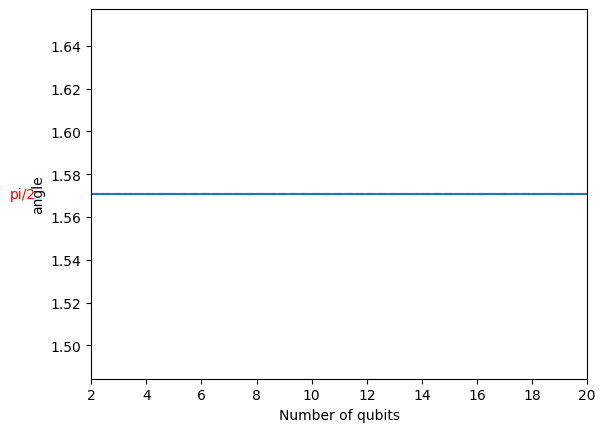

time: 372 ms (started: 2024-07-06 08:14:07 +00:00)


In [ ]:
plt.xlim(2, len(median_thetas))
plt.axhline(y = np.pi/2, color = 'r', linestyle = 'dashed')
plt.text(0,np.pi/2, "pi/2", color="red",
        ha="right", va="center")
plt.xlabel('Number of qubits')
plt.ylabel('angle')
plt.plot([i+1 for i in range(len(median_thetas))],median_thetas)
plt.savefig('median_thetas_20_normal_distribution.svg')
files.download('median_thetas_20_normal_distribution.svg')

In [ ]:
median_thetas1, worst_thetas2 = get_thetas(20, exponential_sin, 0, 1)
median_thetas2, worst_thetas2 = get_thetas(20, exponential_distribution, 0, 1)
median_thetas3, worst_thetas3 = get_thetas(20, normal_distribution, 0, 1)

print("e^(sin(x))", '\nMedian Thetas = ' ,median_thetas1, '\nWorst Thetas - pi/2 = ',worst_thetas2)
print("e^-x", '\nMedian Thetas = ',median_thetas1, '\nWorst Thetas - pi/2 = ',worst_thetas2)
print("Normal Distribution", '\nMedian Thetas = ' ,median_thetas1, '\nWorst Thetas - pi/2 = ',worst_thetas2)

e^(sin(x)) 
Median Thetas =  [1.383037881811141, 1.7733194970424824, 1.7561506653090213, 1.6208771269554416, 1.5967209919757122, 1.5839350322093564, 1.5782725534527846, 1.5745355834922123, 1.572666264173797, 1.5717089993895752, 1.5712564091891594, 1.571026351236921, 1.5709113391245815, 1.5708537213338616, 1.5708250509169597, 1.5708106826715769, 1.570803506015122, 1.5707999162166666, 1.5707981215057818, 1.5707972241503394] 
Worst Thetas - pi/2 =  [0.6882013509140211, 0.3665078410841436, 0.18641092561345363, 0.09361297187871287, 0.046857843285931455, 0.023435354527417518, 0.011718481788307145, 0.005859341472675306, 0.002929683309057518, 0.001464843226131718, 0.0007324218095168256, 0.0003662109293149918, 0.00018310546772726255, 9.15527342475464e-05, 4.577636717195688e-05, 2.2888183592195688e-05, 1.1444091797097045e-05, 5.722045898881589e-06, 2.861022949884884e-06, 1.4305114750534642e-06]
e^-x 
Median Thetas =  [1.383037881811141, 1.7733194970424824, 1.7561506653090213, 1.6208771269554416,

In [ ]:
print("e^(sin(x)):", '\n  Median Thetas = ' ,median_thetas1, '\n  Worst Thetas - pi/2 = ',worst_thetas2)
print("e^(-x):", '\n  Median Thetas = ',median_thetas1, '\n  Worst Thetas - pi/2 = ',worst_thetas2)
print("Normal Distribution:", '\n  Median Thetas = ' ,median_thetas1, '\n  Worst Thetas - pi/2 = ',worst_thetas2)

e^(sin(x)): 
  Median Thetas =  [1.383037881811141, 1.7733194970424824, 1.7561506653090213, 1.6208771269554416, 1.5967209919757122, 1.5839350322093564, 1.5782725534527846, 1.5745355834922123, 1.572666264173797, 1.5717089993895752, 1.5712564091891594, 1.571026351236921, 1.5709113391245815, 1.5708537213338616, 1.5708250509169597, 1.5708106826715769, 1.570803506015122, 1.5707999162166666, 1.5707981215057818, 1.5707972241503394] 
  Worst Thetas - pi/2 =  [0.6882013509140211, 0.3665078410841436, 0.18641092561345363, 0.09361297187871287, 0.046857843285931455, 0.023435354527417518, 0.011718481788307145, 0.005859341472675306, 0.002929683309057518, 0.001464843226131718, 0.0007324218095168256, 0.0003662109293149918, 0.00018310546772726255, 9.15527342475464e-05, 4.577636717195688e-05, 2.2888183592195688e-05, 1.1444091797097045e-05, 5.722045898881589e-06, 2.861022949884884e-06, 1.4305114750534642e-06]
e^(-x): 
  Median Thetas =  [1.383037881811141, 1.7733194970424824, 1.7561506653090213, 1.6208771